In [26]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
df0 = pd.read_excel('mergeBTC_avg_sentiment.xlsx',  header=0)
df0

,Row Labels,Average of Voted Score,BTC open value,BTC close value,Trend
0,2020-12-01 00:00:00,0.371367,19219.878400,19196.724900,0.0
1,2020-12-02 00:00:00,1.552885,18941.746100,18965.663700,1.0
2,2020-12-03 00:00:00,0.496924,19240.132200,19231.922400,0.0
3,2020-12-04 00:00:00,0.150406,18990.606100,18977.465700,0.0
4,2020-12-05 00:00:00,4.759396,18922.234700,18949.649400,1.0
...,...,...,...,...,...
127,2021-04-27 00:00:00,5.807346,54582.006421,54630.066737,1.0
128,2021-04-28 00:00:00,1.733528,54736.099333,54725.624381,0.0
129,2021-04-29 00:00:00,0.450545,53691.891900,53654.725200,0.0
130,2021-04-30 00:00:00,0.179240,55403.227573,55591.135049,1.0


In [31]:
kolone = [ 'Average of Voted Score', 'BTC close value', 'Trend']
df = df0[kolone]
# popunjavamo NaN vrednosti sa prethodnikom 
# df = df.fillna(method='ffill')
# drop last n rows
df.drop(df.tail(1).index,inplace=True) 
df

C:\Users\hesh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Average of Voted Score,BTC close value,Trend
0,0.371367,19196.724900,0.0
1,1.552885,18965.663700,1.0
2,0.496924,19231.922400,0.0
3,0.150406,18977.465700,0.0
4,4.759396,18949.649400,1.0
...,...,...,...
126,0.783132,53083.025644,1.0
127,5.807346,54630.066737,1.0
128,1.733528,54725.624381,0.0
129,0.450545,53654.725200,0.0


In [32]:
X = df
X = np.array(X.drop(['Trend'],1))
y = np.array(df['Trend'])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:

np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [35]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [36]:
predikcije = model.predict(x_test)
predikcije

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
y_test

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1.])

In [38]:
print(classification_report(y_test, predikcije))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.50      0.93      0.65        14

    accuracy                           0.48        27
   macro avg       0.25      0.46      0.33        27
weighted avg       0.26      0.48      0.34        27



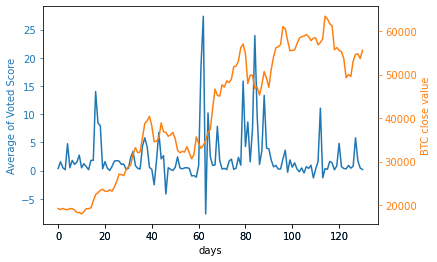

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(df.index, df['Average of Voted Score'], color="C0")
ax.set_xlabel("days")
ax.set_ylabel("Average of Voted Score", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.plot(df.index, df['BTC close value'], color="C1")
#ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
#ax2.set_xlabel('days', color="C1") 
ax2.set_ylabel('BTC close value', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x')
ax2.tick_params(axis='y', colors="C1")

#ax3.plot(df.index, df['BTC close value'], color="C3")
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()